<a href="https://colab.research.google.com/github/LucWeb80/BD_ADA/blob/main/Coping_Struggles_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Stress][def]

[def]: ../data/img/Burnout_min.jpg


---
Priscila, Thais, Luciano, Victor e Raphael

## **Projeto de Machine Learning: Previsão de Dificuldades de Enfrentamento (Coping Struggles) para Seguradora de Saúde** 🌟

Dificuldades de enfrentamento, ou *Coping Struggles*, afetam profundamente a saúde mental e o bem-estar dos segurados. Este projeto visa desenvolver um modelo preditivo para auxiliar uma seguradora de saúde a identificar precocemente indivíduos que possam precisar de suporte emocional, permitindo que intervenções preventivas e personalizadas sejam oferecidas. 💼💡

#### **Objetivo:**

Criar uma ferramenta preditiva que, baseada nas respostas de um questionário, permita à seguradora avaliar o risco de dificuldades de enfrentamento entre seus segurados, facilitando a oferta de programas de apoio à saúde mental. Esse tipo de ação preventiva pode ajudar a reduzir custos futuros e melhorar a qualidade de vida dos segurados. 🙌

#### **Dataset:**

Será utilizado o *[Mental Health Dataset](https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset)* do Kaggle, que contém informações sobre histórico de saúde mental, apoio social, ambiente de trabalho, entre outros fatores relevantes. Esses dados ajudarão a identificar padrões associados a dificuldades de enfrentamento e a treinar o modelo para prever esses desafios com maior precisão. 📊

#### **Como será usada a solução:**

A ferramenta será integrada à plataforma da seguradora, onde os segurados poderão responder perguntas sobre seu bem-estar mental, estratégias de enfrentamento e outros fatores de risco. Com base nessas respostas, o modelo fornecerá uma análise do risco de dificuldades de enfrentamento, possibilitando que a seguradora ofereça programas de apoio, aconselhamento e recursos de saúde mental específicos para cada necessidade. 🧠🔍

#### **Benefícios para a Seguradora:**

- **Prevenção e Redução de Custos**: Ao identificar clientes em risco, a seguradora pode intervir preventivamente, o que pode reduzir a necessidade de tratamentos caros e melhorar o bem-estar dos segurados.
- **Customização de Planos de Saúde Mental**: Com uma compreensão mais detalhada dos riscos, a seguradora pode oferecer pacotes de saúde mental personalizados, agregando valor aos serviços e aumentando a satisfação do cliente.
- **Dados para Programas de Saúde Preventiva**: O modelo permitirá à seguradora detectar padrões e prever demandas futuras para programas de bem-estar e saúde mental, melhorando a gestão de recursos.

#### **Desempenho do modelo:**

O modelo será avaliado com base na precisão, recall e F1-score, com ênfase em um alto recall para minimizar os casos de dificuldade de enfrentamento que passam despercebidos. A meta será atingir pelo menos 80% de recall e 75% de precisão. 📈✅

#### **Problemas comparáveis e reutilização de ferramentas:**

Modelos usados para previsão de saúde mental em empresas e programas de bem-estar fornecem uma base importante. Ferramentas de classificação binária e análise de dados psicossociais serão úteis para criar uma solução robusta e confiável. 🔄

#### **Coleta e Preparação dos Dados:**

O dataset será tratado para incluir fatores de enfrentamento, como apoio social, estresse no trabalho e histórico de saúde mental. Será realizada uma adequação dos dados para garantir que os insights produzidos atendam às exigências de proteção e privacidade, em conformidade com a LGPD e outras regulamentações. 📂🔒

#### **Conclusão:**

Com esse projeto, a seguradora poderá identificar segurados em risco de dificuldades emocionais e fornecer suporte antecipado, contribuindo para um serviço de saúde mental mais preventivo e humanizado. Essa iniciativa poderá não só melhorar a qualidade de vida dos clientes, mas também agregar valor aos serviços da seguradora, diferenciando-a no mercado. 🌱💼

---


# **1. Importação das bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.express as px
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import joblib

#### **2. Carregamento dos dados**

In [ ]:
# Carregar o dataset
df = pd.read_csv("/content/Mental Health Dataset.csv")

#### **3. Estudo de cada atributo e suas características**

In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

O DataFrame contém 292364 entradas e 17 colunas, todas do tipo object. A maioria das colunas não possui valores nulos, exceto self_employed, que tem 287162 valores não nulos. O uso de memória do DataFrame é de aproximadamente 37.9 MB. As colunas incluem informações sobre gênero, país, ocupação, histórico familiar, tratamento, dias dentro de casa, estresse crescente, mudanças de hábitos, histórico de saúde mental, oscilações de humor, dificuldades de enfrentamento, interesse no trabalho, fraqueza social, entrevistas de saúde mental e opções de cuidado.

In [ ]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


A análise dos dados revela que a maioria dos respondentes são homens dos Estados Unidos, com a ocupação mais comum sendo dona de casa. A maioria não é autônoma e não possui histórico familiar de problemas de saúde mental, embora muitos tenham recebido tratamento. A maioria passou de 1 a 14 dias em ambientes fechados e relatou mudanças nos hábitos e níveis médios de oscilações de humor. Muitos não têm dificuldades de enfrentamento, não estão interessados no trabalho e têm incertezas sobre suas opções de cuidados. Esses insights podem orientar intervenções e programas de apoio à saúde mental. `verificar se essas informações são reais`

In [ ]:
df.isna().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


#### **4. Identificar os Potenciais Atributos para Prever Dificuldades de Enfrentamento**

Para identificar os potenciais atributos para prever dificuldades de enfrentamento (Coping Struggles), é essencial analisar os dados disponíveis no dataset e entender como cada atributo pode influenciar o comportamento e a saúde mental dos indivíduos. Com base no contexto do dataset, que inclui informações sobre histórico de saúde mental, apoio social, ambiente de trabalho, entre outros fatores, podemos destacar os seguintes atributos como potenciais preditores:

- **Histórico de Saúde Mental (Mental_Health_History)**:
    - Indivíduos com histórico de problemas de saúde mental podem ter maior probabilidade de enfrentar dificuldades de enfrentamento. Este atributo pode fornecer insights sobre a vulnerabilidade do indivíduo a problemas emocionais.

- **Estresse Crescente (Growing_Stress)**:
    - O nível de estresse crescente pode ser um indicador direto de dificuldades de enfrentamento. Indivíduos que relatam aumento no estresse podem estar mais propensos a enfrentar desafios emocionais.

- **Mudanças de Hábitos (Changes_Habits)**:
    - Mudanças significativas nos hábitos, como alterações no sono, alimentação ou atividades diárias, podem ser sinais de dificuldades de enfrentamento. Este atributo pode ajudar a identificar mudanças comportamentais que precedem problemas emocionais.

- **Dias Dentro de Casa (Days_Indoors)**:
    - O tempo que um indivíduo passa dentro de casa pode refletir seu nível de isolamento social e bem-estar emocional. Indivíduos que passam mais tempo dentro de casa podem estar enfrentando dificuldades de enfrentamento.

- **Gênero (Gender)**:
    - O gênero pode influenciar a forma como os indivíduos lidam com o estresse e as dificuldades emocionais. Diferentes gêneros podem ter diferentes níveis de vulnerabilidade a problemas de enfrentamento.

- **Histórico Familiar (family_history)**:
    - Um histórico familiar de problemas de saúde mental pode aumentar a probabilidade de um indivíduo enfrentar dificuldades de enfrentamento. Este atributo pode fornecer informações sobre predisposições genéticas e ambientais.

- **Ocupação (Occupation)**:
    - O tipo de ocupação pode influenciar o nível de estresse e a capacidade de enfrentamento dos indivíduos. Certas ocupações podem ser mais estressantes e exigir mais habilidades de enfrentamento.

- **Autoemprego (self_employed)**:
    - Indivíduos autônomos podem enfrentar diferentes tipos de estresse e desafios em comparação com aqueles que trabalham para empregadores. Este atributo pode ajudar a identificar diferenças nas dificuldades de enfrentamento entre esses grupos.

- **Entrevista de Saúde Mental (mental_health_interview)**:
    - A disposição de um indivíduo para participar de entrevistas de saúde mental pode indicar sua abertura para discutir e enfrentar problemas emocionais. Este atributo pode ser um indicador de conscientização e proatividade em relação à saúde mental.

- **Opções de Cuidado (care_options)**:
    - A disponibilidade e o acesso a opções de cuidado de saúde mental podem influenciar a capacidade de enfrentamento dos indivíduos. Este atributo pode ajudar a identificar a relação entre suporte disponível e dificuldades de enfrentamento.

Esses atributos, quando analisados em conjunto, podem fornecer uma visão abrangente dos fatores que contribuem para as dificuldades de enfrentamento dos indivíduos. A análise desses atributos pode ajudar a construir um modelo preditivo robusto para identificar aqueles que podem precisar de suporte emocional e intervenções preventivas, dessa maneira, serão testados e avaliados para determinar sua relevância e impacto na previsão de dificuldades de enfrentamento.

#### **5. Visualização dos dados**

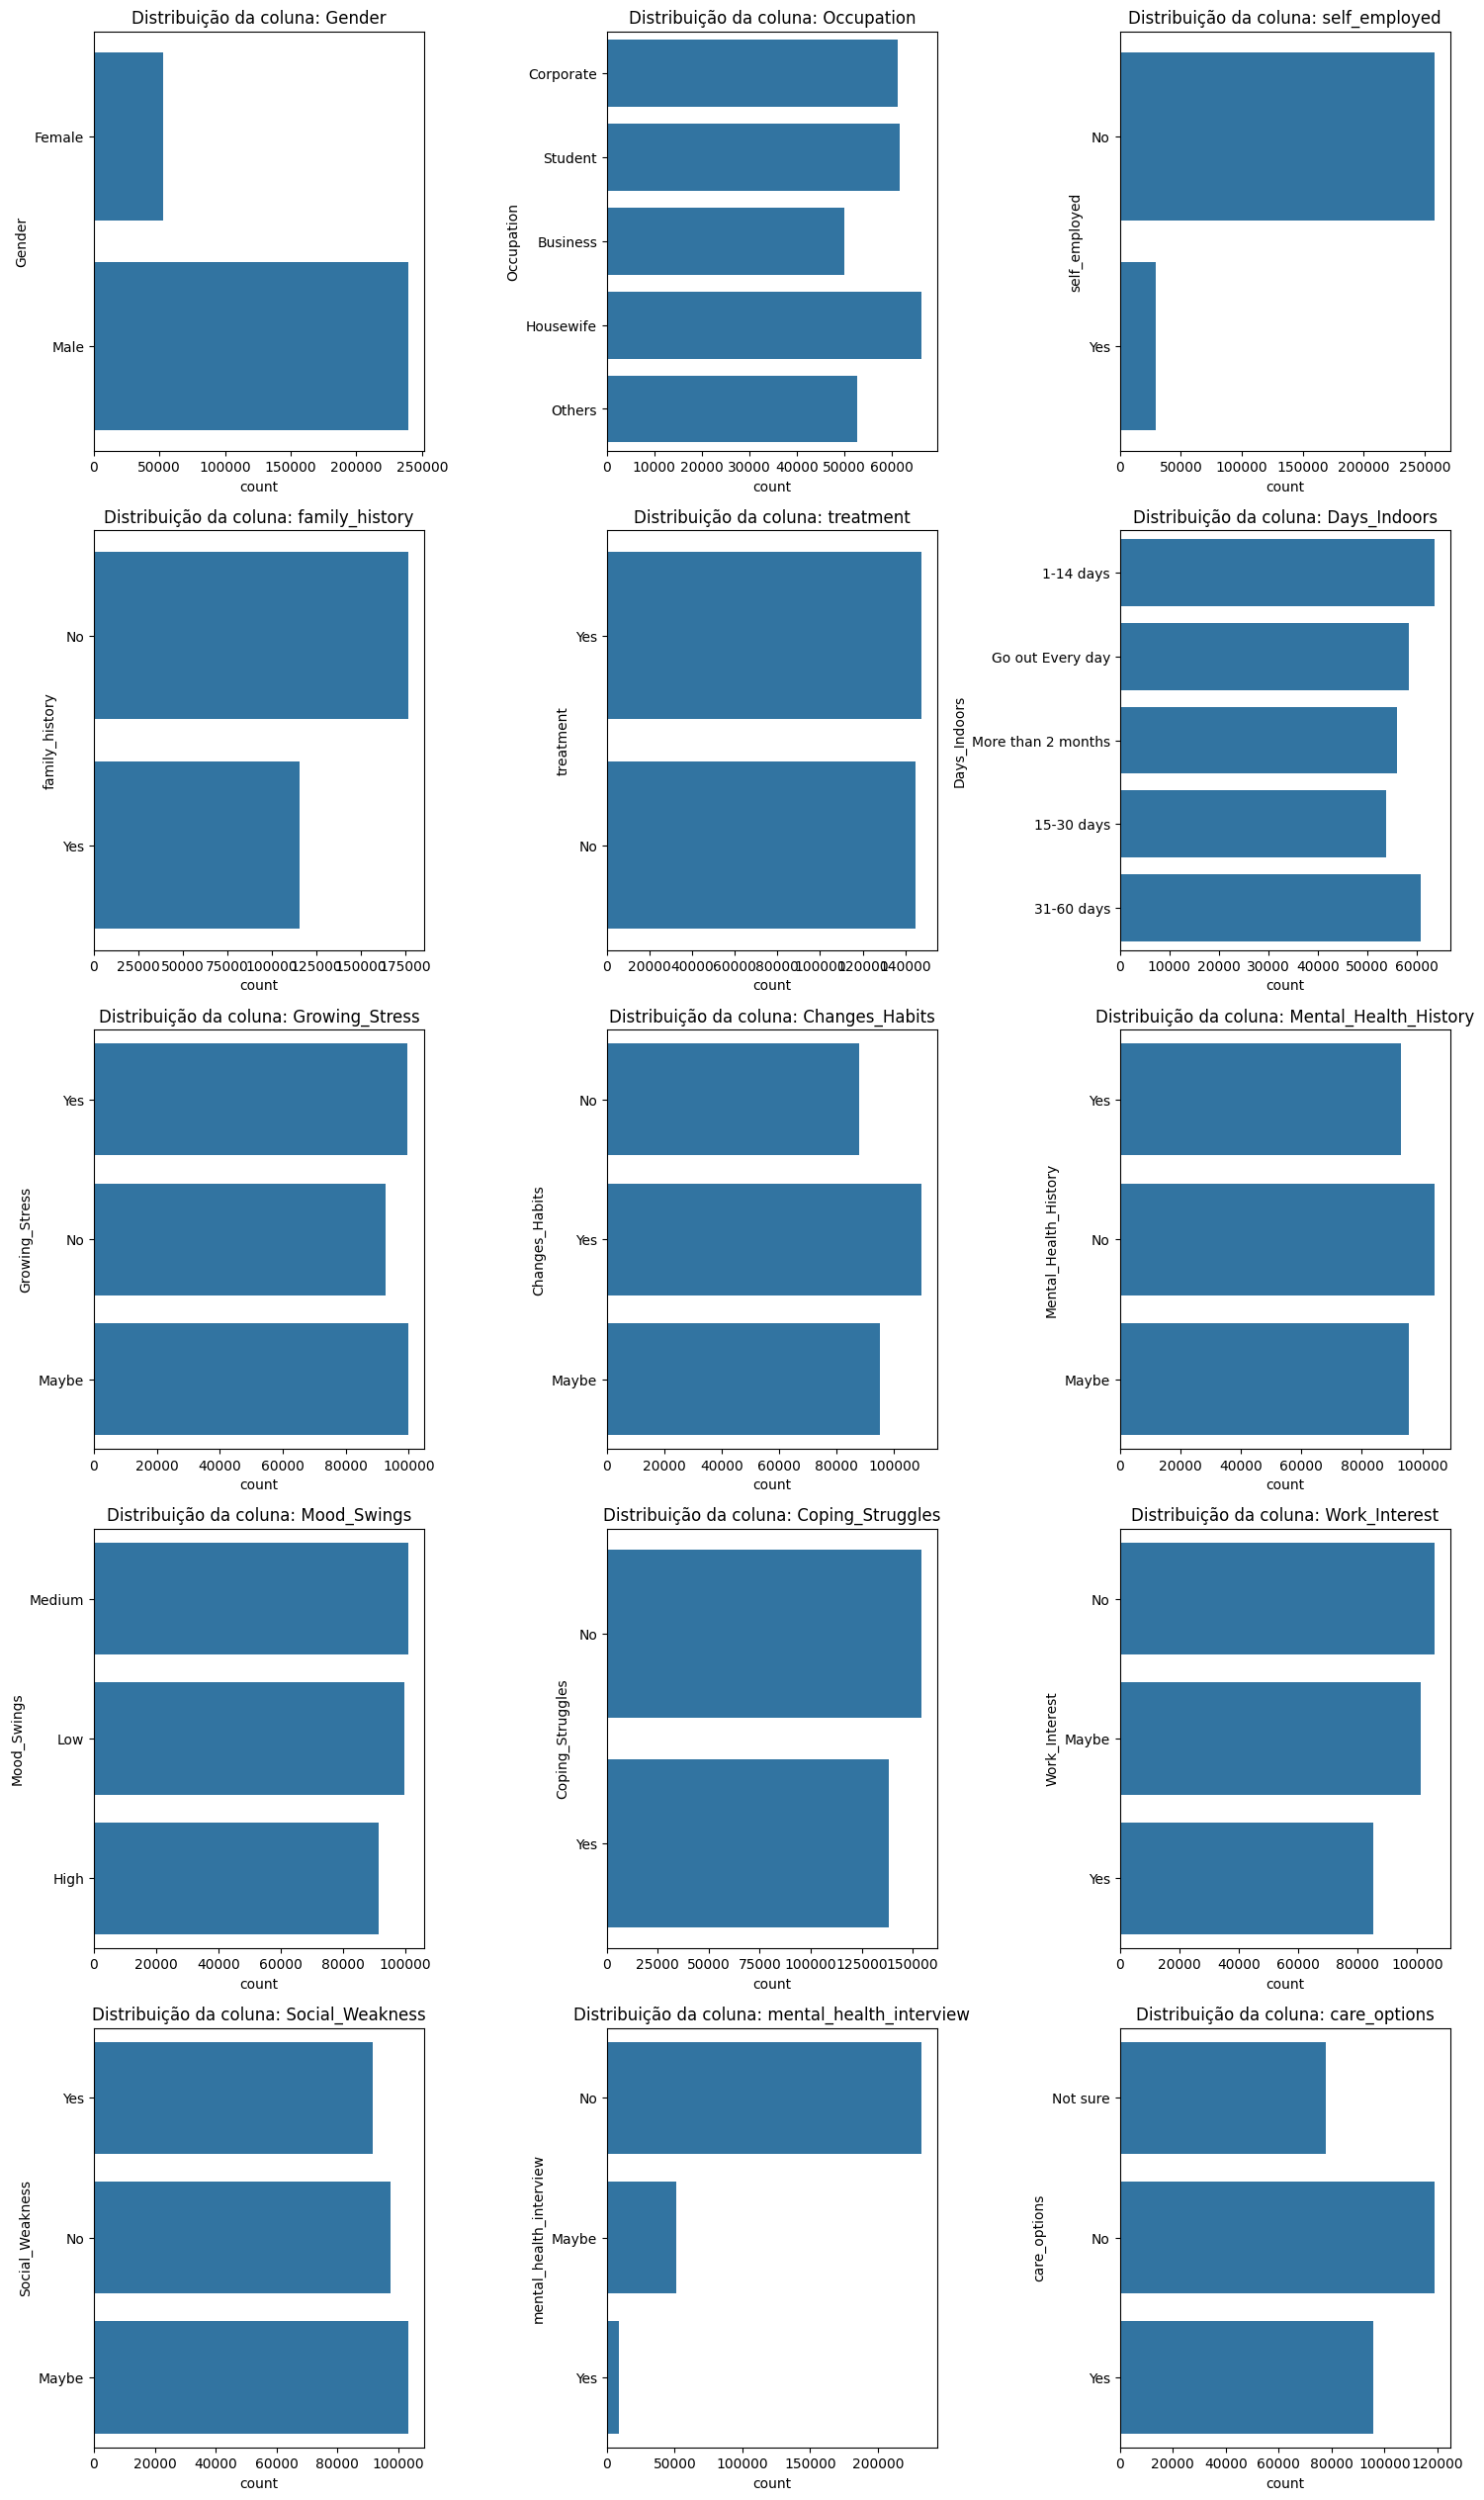

In [ ]:
# Remover a coluna Timestamp e Country
df_eda = df.drop(['Timestamp', 'Country'], axis=1, inplace=False)

# Supondo que seu DataFrame se chama df
num_cols = len(df_eda.columns)
num_rows = (num_cols // 3) + 1

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, column in enumerate(df_eda.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.countplot(y=column, data=df_eda, ax=ax)
    ax.set_title(f'Distribuição da coluna: {column}')

# Remover subplots vazios
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

A imagem apresenta a distribuição de diversas variáveis relacionadas a questões de saúde mental e bem-estar. A partir dos gráficos, podemos observar que a maioria das pessoas não apresenta histórico familiar de condições mentais, mas um número significativo de indivíduos enfrenta estresse crescente, alterações nos hábitos e dificuldades de lidar com a situação. Além disso, a prevalência de mudanças de humor é alta, e muitas pessoas indicam ter dificuldades em lidar com o estresse e em se manter motivadas no trabalho. Também é notável que uma grande parte da população do conjunto de dados passa até 14 dias seguidos em casa, sugerindo possível impacto na rotina e no comportamento social. A busca por tratamento é mais comum entre os participantes, enquanto o interesse por opções de cuidados parece ser uma preocupação relevante. A falta de entrevistas sobre saúde mental e a distribuição equilibrada de respostas sobre fraqueza social indicam uma variabilidade nas experiências e no engajamento com o apoio à saúde mental. `

In [ ]:
# Contar a quantidade de dados para cada país
country_counts = df['Country'].value_counts().reset_index()

# Renomear as colunas
country_counts.columns = ['Country', 'Count']

# Crie o gráfico de mapa
fig = px.choropleth(
    country_counts,
    locations="Country",  # Coluna com os nomes dos países
    locationmode="country names",  # Indica que usaremos o nome dos países
    color="Count",  # Coluna com a contagem de dados
    color_continuous_scale="Viridis",  # Escala de cor
    title="Contagem de Dados por País"
)

# Ajuste o tamanho do mapa
fig.update_layout(
    width=1200,  # Largura do gráfico
    height=800   # Altura do gráfico
)

# Exiba o gráfico
fig.show()

A análise do conjunto de dados revela que a maioria das respostas provém dos Estados Unidos, com um total de 171.308 entradas, representando uma parcela significativa do total de 292.364 registros. Essa predominância pode influenciar os resultados do modelo preditivo, uma vez que as características e padrões de comportamento dos respondentes dos Estados Unidos podem não ser representativos de outras regiões. Portanto, é crucial considerar essa distribuição ao interpretar os resultados e ao aplicar o modelo em contextos internacionais, garantindo que as intervenções e programas de apoio à saúde mental sejam adequados e eficazes para diferentes populações.

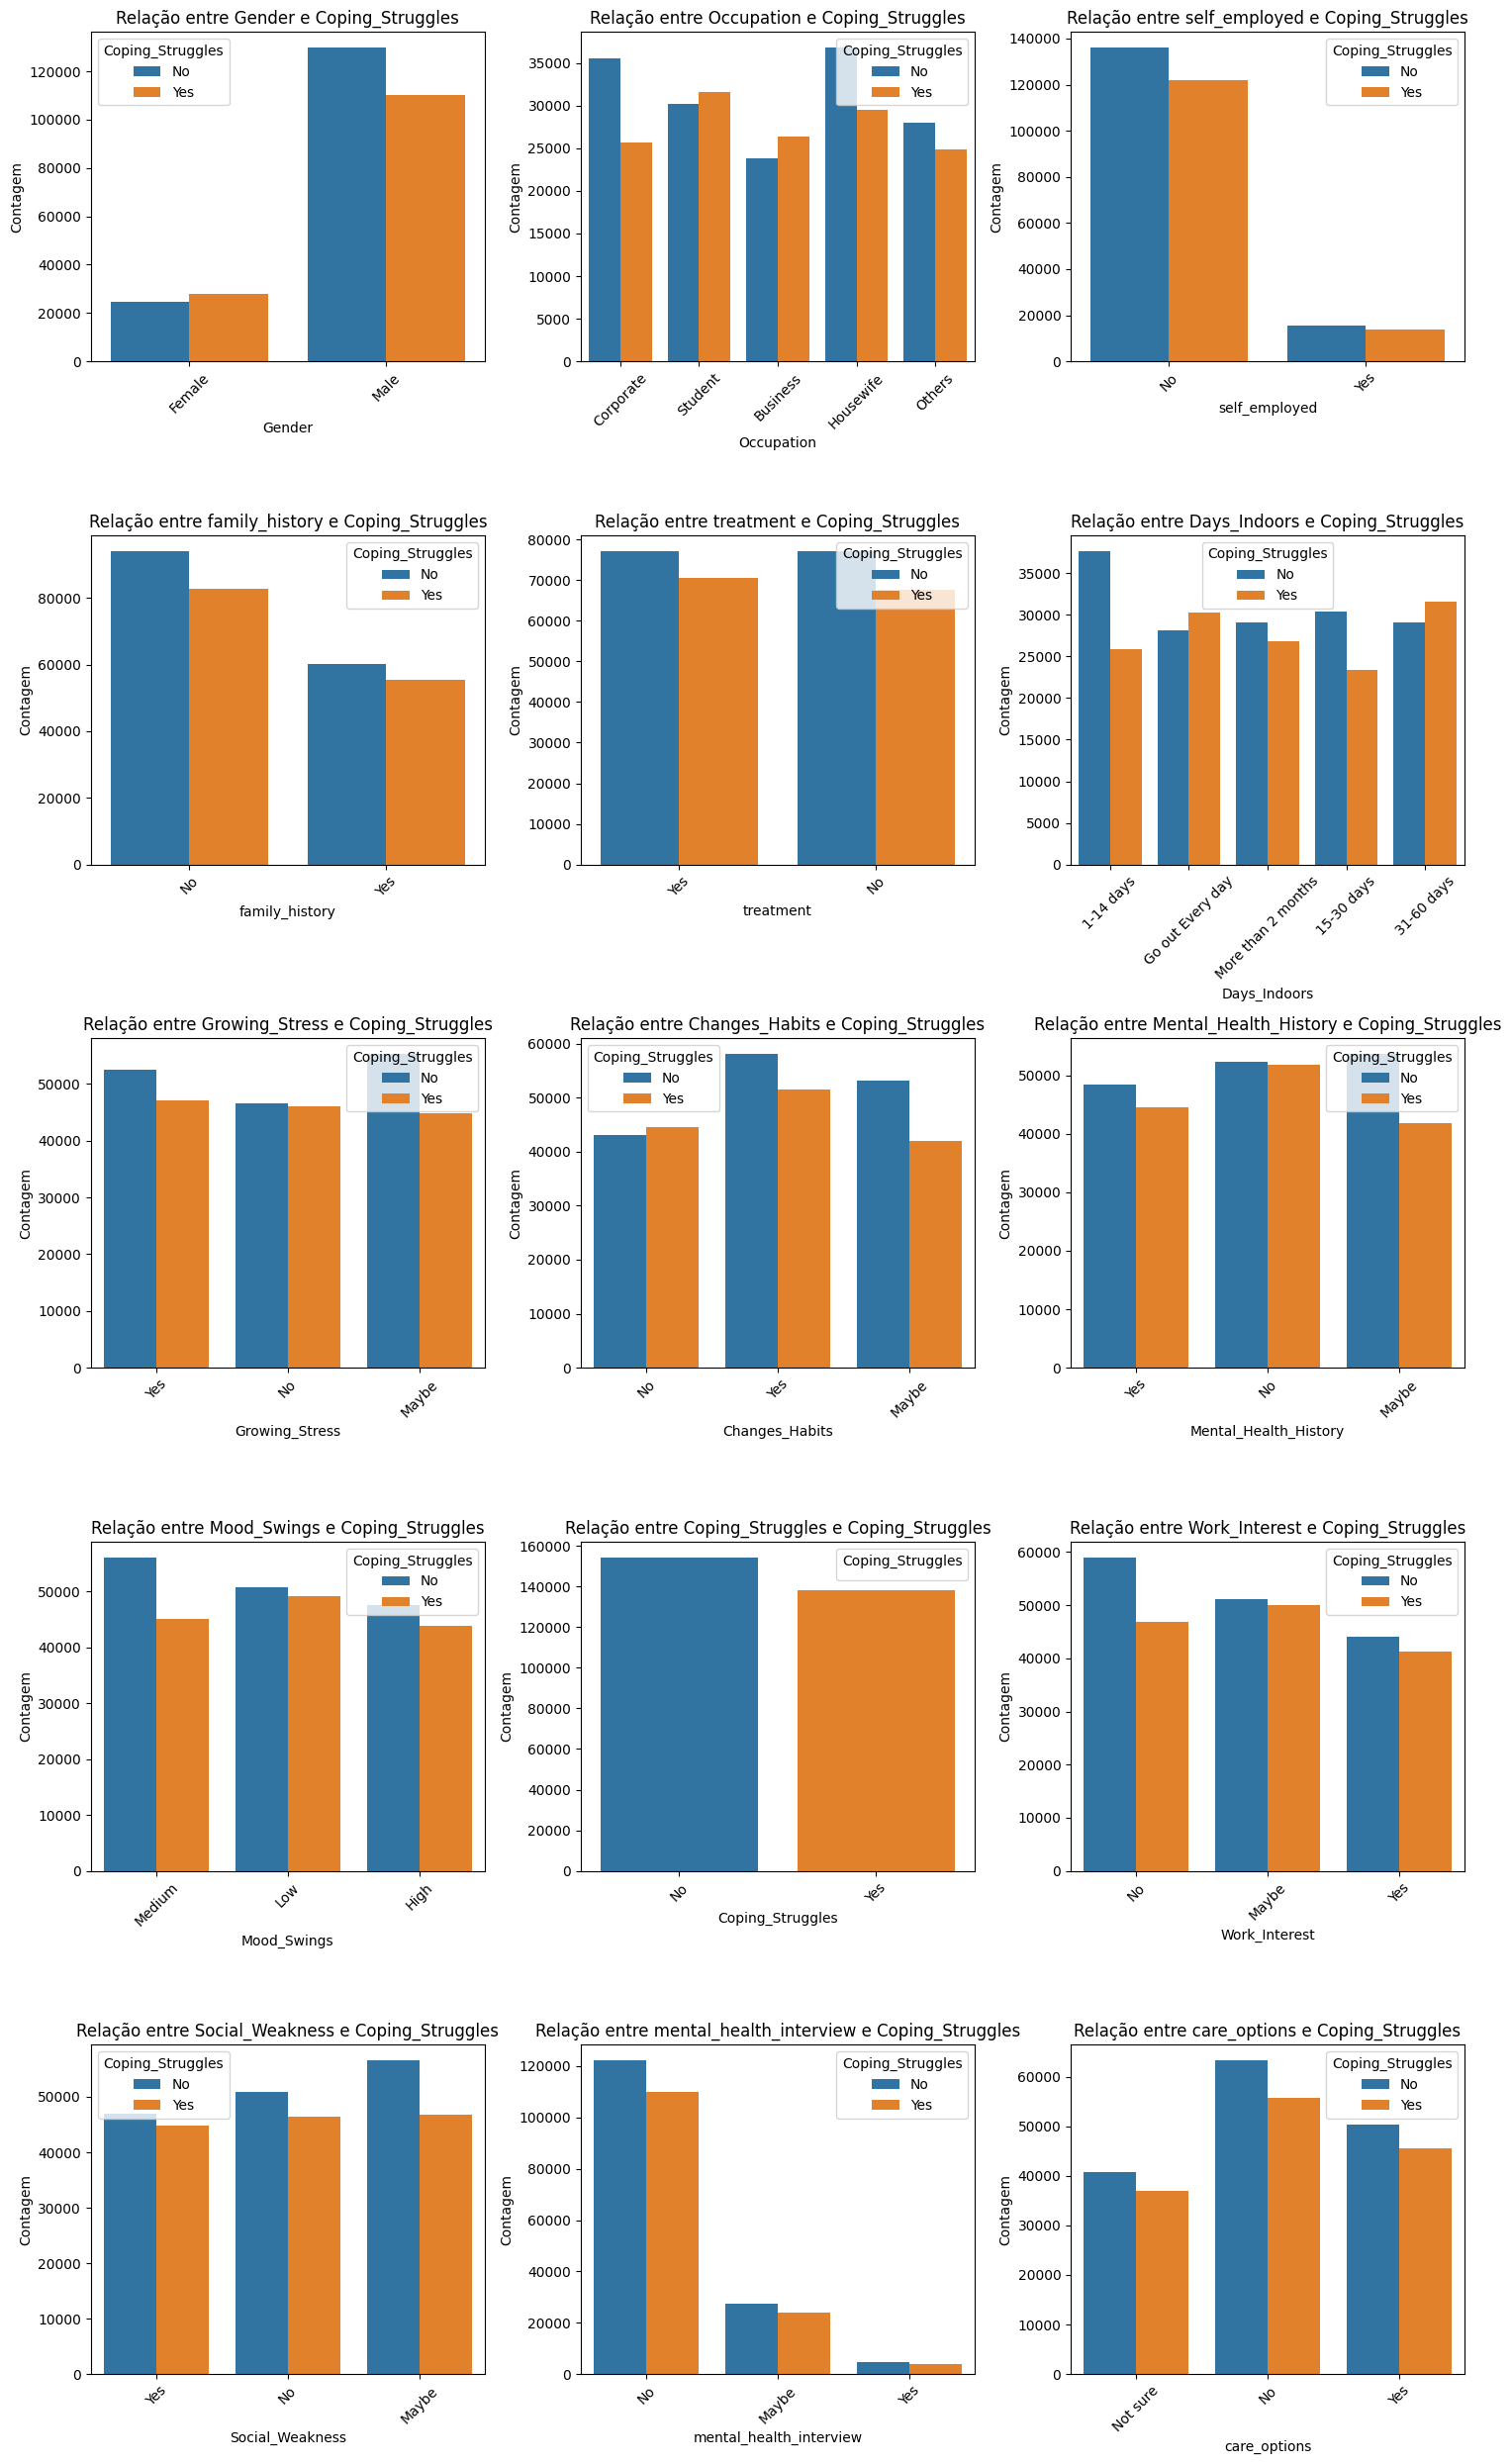

In [ ]:
# Selecionar colunas categóricas, excluindo a coluna 'pais'
categorical_cols = df_eda.select_dtypes(include=['object']).columns

# Definir o número de linhas e colunas para os subplots
n_cols = 3
n_rows = (len(categorical_cols) + 1) // n_cols

# Criar subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotar cada variável categórica
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Coping_Struggles', ax=axes[i])
    axes[i].set_title(f'Relação entre {col} e Coping_Struggles')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Contagem')
    axes[i].legend(title='Coping_Struggles')
    axes[i].tick_params(axis='x', rotation=45)

# Remover subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#Análises das Variáveis e Coping_Struggles

**Gênero:**

**Feminino (Female):** Maior proporção de dificuldades de enfrentamento.

**Masculino (Male):** Maior proporção de indivíduos sem dificuldades de enfrentamento.

**Ocupação:**

**Housewife (Dona de Casa):** Maior contagem de dificuldades de enfrentamento.

**Corporate (Corporativo) e Student (Estudante):** Também têm alta contagem de dificuldades.

Trabalho Autônomo:

**Não Autônomos (No):** Maior contagem de dificuldades de enfrentamento.

**Autônomos (Yes):** Menor proporção de dificuldades de enfrentamento.


**Mudanças de Humor (Mood Swings):**


**Médias (Medium) e Altas (High):** Mais associadas a dificuldades de enfrentamento.

**Baixas (Low):** Maior proporção de indivíduos sem dificuldades.


**Interesse no Trabalho (Work Interest):**


**Interesse Baixo (No):** Associado a mais dificuldades.

**Interesse Alto (Yes):** Associado a menos dificuldades.


**Fraqueza Social (Social Weakness):**


**Sim (Yes):** Mais dificuldades de enfrentamento.

**Não (No):** Menos dificuldades de enfrentamento.


**Entrevista de Saúde Mental (Mental Health Interview):**


**Sim (Yes):** Mais dificuldades de enfrentamento.

**Não (No):** Menos dificuldades de enfrentamento.


**Opções de Cuidados (Care Options):**


**Sem opções (No):** Mais dificuldades de enfrentamento.

**Com opções (Yes):** Menos dificuldades de enfrentamento.


**Histórico Familiar (Family History):**


**Sim (Yes):** Mais dificuldades de enfrentamento.

**Não (No):** Menos dificuldades de enfrentamento.


**Tratamento (Treatment):**



**Sim (Yes):** Relacionado a dificuldades contínuas de enfrentamento.

**Não (No):** Proporção quase igual entre ter ou não dificuldades.


**Dias Dentro de Casa (Days Indoors):**


**1-14 dias e Sair todos os dias (Go out Every day):** Menos dificuldades.

**Mais de 2 meses (More than 2 months):** Mais dificuldades.


**Conclusão Geral**

Esses gráficos mostram que várias variáveis, como gênero, ocupação, mudanças de humor, interesse no trabalho, fraqueza social, entrevistas de saúde mental, opções de cuidados, histórico familiar, tratamento e dias passados dentro de casa, têm uma relação significativa com as dificuldades de enfrentamento (Coping_Struggles). Padrões emergem sugerindo que indivíduos com maior suporte, opções de cuidados, interesse no trabalho, e menor tempo dentro de casa tendem a relatar menos dificuldades de enfrentamento. Por outro lado, aqueles com histórico familiar de problemas de saúde mental, mudanças de humor altas ou médias, e maior tempo passado dentro de casa tendem a enfrentar mais dificuldades.

Essas informações podem ser valiosas para direcionar intervenções e programas de suporte específicos para ajudar as pessoas a enfrentarem melhor suas dificuldades.

In [ ]:
df.drop(['Timestamp'], axis=1, inplace=True)

for column in df.columns:
    unique_values = df[column].unique()
    print(f'Valores únicos da coluna {column}:')
    print(unique_values)
    print('\n')

Valores únicos da coluna Gender:
['Female' 'Male']


Valores únicos da coluna Country:
['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']


Valores únicos da coluna Occupation:
['Corporate' 'Student' 'Business' 'Housewife' 'Others']


Valores únicos da coluna self_employed:
[nan 'No' 'Yes']


Valores únicos da coluna family_history:
['No' 'Yes']


Valores únicos da coluna treatment:
['Yes' 'No']


Valores únicos da coluna Days_Indoors:
['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']


Valores únicos da coluna Growing_Stress:
['Yes' 'No' 'Maybe']


Valores únicos da coluna Changes_Habits:
['No' 'Yes' '

#### **6. Estudo das correlações entre atributos**

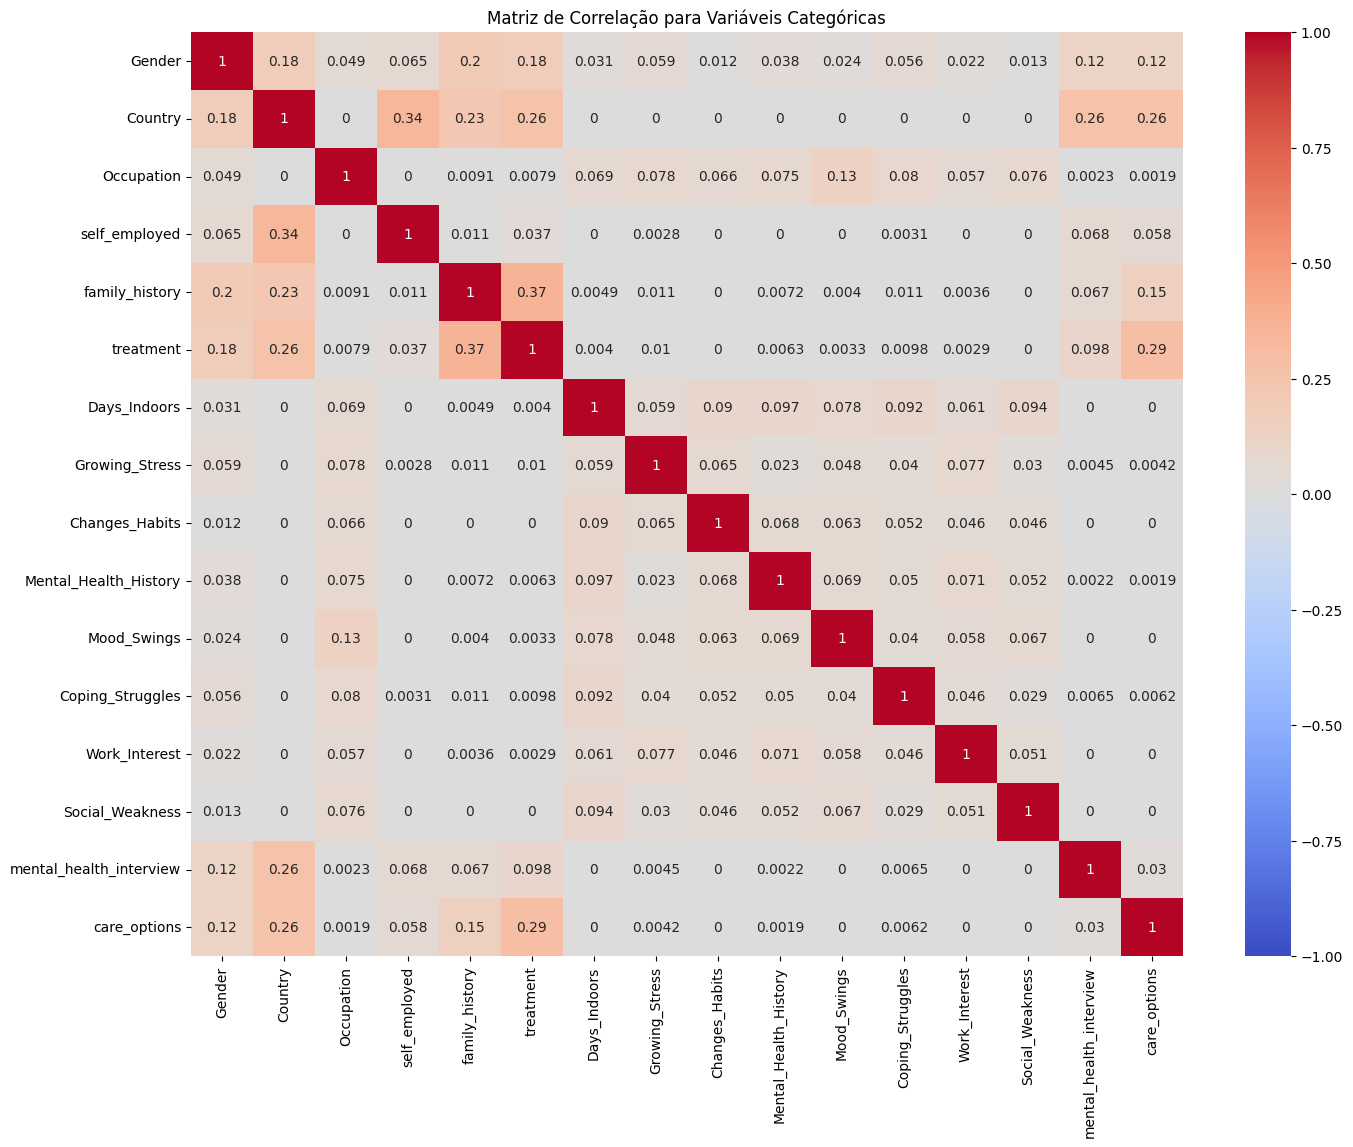

In [ ]:
# Análise de Correlação para Variáveis Categóricas
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

correlation_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
for col1 in df.columns:
    for col2 in df.columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', vmax=1, vmin=-1, )
plt.title('Matriz de Correlação para Variáveis Categóricas')
plt.show()

Para analisar a correlação entre variáveis categóricas, utilizamos o coeficiente de Cramér (Cramér's V). Esse método começa com a construção de uma matriz de confusão (ou tabela de contingência) entre duas variáveis categóricas. Em seguida, aplicamos o teste qui-quadrado (chi-squared test) para calcular o valor do qui-quadrado (chi²), que mede a independência entre as variáveis. A partir deste valor, calculamos phi², que é o qui-quadrado dividido pelo número total de observações, e ajustamos phi² com um fator de correção para evitar vieses baseados nas dimensões da matriz de confusão. Finalmente, o valor ajustado é normalizado para obter o coeficiente de Cramér, que varia de 0 a 1. Nesse intervalo, 0 indica nenhuma associação e 1 representa uma associação perfeita. Esse coeficiente é então usado para preencher uma matriz de correlação visualizada em um mapa de calor (heatmap), permitindo uma interpretação mais clara das associações entre múltiplas variáveis categóricas.

Ao interpretar os valores de correlação na matriz, podemos observar diferentes níveis de associação entre as variáveis. Valores próximos de 1 indicam uma associação forte, como entre `treatment` e `family_history` (0.37), sugerindo que histórico familiar pode influenciar na busca por tratamento. Valores intermediários, entre 0.1 e 0.3, representam uma associação moderada, como em `care_options` e `treatment` (0.29), sugerindo uma relação moderada entre o acesso a opções de cuidado e a necessidade de tratamento. Por fim, valores próximos de 0 indicam associações fracas ou inexistentes, como em `Occupation` e `self_employed` (0.0091), mostrando que a ocupação não parece estar relacionada ao status de trabalho autônomo. A análise pelo coeficiente de Cramér ajuda a identificar quais variáveis possuem relações mais significativas, direcionando o foco para aquelas que podem ter impacto relevante na análise subsequente.

#### **7. Identificar as transformações promissoras que você pode querer aplicar**

O **One-Hot Encoding** e o **Label Encoding** são técnicas populares de transformação de variáveis categóricas em modelos de machine learning. No **One-Hot Encoding**, cada categoria é convertida em uma nova coluna binária, representando a presença (1) ou ausência (0) de uma categoria específica. Já no **Label Encoding**, as categorias são convertidas em valores numéricos inteiros, mantendo a ordem ou hierarquia da variável. No caso do nosso conjunto de dados, as colunas **'Mood_Swings'** e **'Days_Indoors'** passarão por **Label Encoding**, uma vez que são variáveis categóricas ordinais. A coluna **"Country"** será transformada em uma variável de **continentes**, agrupando os países por regiões geográficas, enquanto as demais colunas serão convertidas por **One-Hot Encoding** para representar as diferentes categorias sem implicar em hierarquia. Essas transformações garantem que as variáveis categóricas sejam adequadamente representadas para os modelos de machine learning.

#### 8. **Identificar dados adicionais que seriam úteis**

Para enriquecer o dataset e obter uma análise mais precisa, seria útil incluir dados adicionais que abrangem diferentes aspectos do indivíduo. Informações demográficas, como idade, nível educacional, estado civil e tipo de moradia, poderiam revelar variações no enfrentamento de dificuldades conforme diferentes características sociodemográficas. Além disso, um histórico mais detalhado de saúde mental, incluindo diagnósticos anteriores e tratamentos realizados, pode proporcionar um contexto importante sobre como fatores preexistentes influenciam as dificuldades de enfrentamento. Fatores de estilo de vida, como hábitos de sono, nível de atividade física e consumo de substâncias (como álcool e tabaco), também são cruciais, pois podem ter um impacto significativo na saúde mental e na capacidade de lidar com o estresse. Esse processo de identificação de dados adicionais é essencial para construir uma análise mais robusta e personalizada sobre as dificuldades no enfrentamento, alinhando o conhecimento do domínio com as particularidades do problema em questão.

### **Preparar os dados**

#### 9. **Limpeza de Dados**

In [ ]:
df.dropna(inplace=True)

Removemos os valores nulos do dataset, pois representavam uma pequena parcela dos dados e julgamos que não traziam informações relevantes o suficiente para justificar sua manutenção.

#### 10. **Engenharia de Atributos**

In [ ]:
# Dicionário de mapeamento de países para continentes
country_to_continent = {
    'United States': 'North America', 'Poland': 'Europe', 'Australia': 'Oceania', 'Canada': 'North America',
    'United Kingdom': 'Europe', 'South Africa': 'Africa', 'Sweden': 'Europe', 'New Zealand': 'Oceania',
    'Netherlands': 'Europe', 'India': 'Asia', 'Belgium': 'Europe', 'Ireland': 'Europe', 'France': 'Europe',
    'Portugal': 'Europe', 'Brazil': 'South America', 'Costa Rica': 'North America', 'Russia': 'Europe',
    'Germany': 'Europe', 'Switzerland': 'Europe', 'Finland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe',
    'Bosnia and Herzegovina': 'Europe', 'Singapore': 'Asia', 'Nigeria': 'Africa', 'Croatia': 'Europe',
    'Thailand': 'Asia', 'Denmark': 'Europe', 'Mexico': 'North America', 'Greece': 'Europe', 'Moldova': 'Europe',
    'Colombia': 'South America', 'Georgia': 'Europe', 'Czech Republic': 'Europe', 'Philippines': 'Asia'
}

# Criar a nova coluna 'Continent' no DataFrame
df['Continent'] = df['Country'].map(country_to_continent)

In [ ]:
df.drop('Country', axis=1, inplace=True)

# Colunas para one-hot encoding
columns_to_encode = [
    'Gender', 'Continent', 'Occupation', 'self_employed', 'family_history', 'treatment',
    'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles',
    'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options'
]

# Realizar o one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

In [ ]:
# Label encoding for Mood_Swings
df_encoded['Mood_Swings'] = df_encoded['Mood_Swings'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Label encoding for Days_Indoors
df_encoded['Days_Indoors'] = df_encoded['Days_Indoors'].map({
    'Go out Every day': 1,
    '1-14 days': 2,
    '15-30 days': 3,
    '31-60 days': 4,
    'More than 2 months': 5
})

#### 11. **Seleção de Atributos**

Segmentação: Inclusão de Variáveis Sintomas com Risco Controlado
Essa segmentação permite o teste de variáveis potencialmente correlacionadas com coping, mas ainda com controle de vazamento, removendo as colunas redundantes.

Features Selecionadas:

In [ ]:
features = [
    'Gender_Female',
    'Continent_Africa', 'Continent_Asia', 'Continent_Europe',
    'Continent_North America', 'Continent_Oceania',
    'Occupation_Business', 'Occupation_Corporate', 'Occupation_Housewife',
    'Occupation_Others',
    'self_employed_No',
    'family_history_No',
    'treatment_No',
    'Days_Indoors',
    'Social_Weakness_Maybe', 'Social_Weakness_No',
    'mental_health_interview_Maybe', 'mental_health_interview_No',
    'care_options_No', 'care_options_Not sure',
    'Mood_Swings',  # Mantém como label encoded
    'Growing_Stress_Maybe', 'Growing_Stress_No'  # Exclui 'Growing_Stress_Yes'
]

print(f'Total de features: {len(features)}')

#df_encoded_X = df_encoded[features]


Racionalidade: Este conjunto permite ao modelo considerar variáveis comportamentais e emocionais, como Mood_Swings e Growing_Stress, que estão indiretamente ligadas ao coping. Remover uma coluna de cada conjunto one-hot encoded reduz a redundância e previne data leakage.

In [ ]:
# Definir a variável alvo e as variáveis preditoras
X = df_encoded_X
y = df_encoded['Coping_Struggles_Yes']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (229729, 23)
Tamanho do conjunto de teste: (57433, 23)


#### 12. **Experimentacão inicial de modelos**

In [ ]:
# Lista de modelos para testar
models = {
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1), # Mais demorado para treinar, enquanto os demais levam segundos, este leva minutos (Mais de 90% do tempo que leva para executar ocorre por conta do KNN).
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Dicionário para armazenar os modelos treinados
trained_models = {}

# Loop para treinar e avaliar cada modelo
for name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Salvar o modelo treinado no dicionário
    trained_models[name] = model

    # Fazer previsões com os dados de treino
    y_train_pred = model.predict(X_train)

    # Fazer previsões com os dados de teste
    y_test_pred = model.predict(X_test)

    # Avaliar o modelo no conjunto de treino
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'{name} Train Accuracy: {train_accuracy}')
    print(f'{name} Train Classification Report:\n{classification_report(y_train, y_train_pred)}')

    # Avaliar o modelo no conjunto de teste
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{name} Test Accuracy: {test_accuracy}')
    print(f'{name} Test Classification Report:\n{classification_report(y_test, y_test_pred)}\n')

Logistic Regression Train Accuracy: 0.535086993805745
Logistic Regression Train Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.71      0.62    121130
        True       0.51      0.34      0.41    108599

    accuracy                           0.54    229729
   macro avg       0.53      0.52      0.51    229729
weighted avg       0.53      0.54      0.52    229729

Logistic Regression Test Accuracy: 0.5368864590044051
Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.72      0.62     30479
        True       0.51      0.33      0.40     26954

    accuracy                           0.54     57433
   macro avg       0.53      0.52      0.51     57433
weighted avg       0.53      0.54      0.52     57433


K-Nearest Neighbors Train Accuracy: 0.8744912483839654
K-Nearest Neighbors Train Classification Report:
              precision    recall  f

#### 13. **Medir e Comparar Desempenho com Validação Cruzada com os melhores modelos iniciais**

In [ ]:
# Definir os modelos
models = {
    "K-Nearest Neighbors": trained_models["K-Nearest Neighbors"],
    "Random Forest": trained_models["Random Forest"]
}

# Loop para realizar a validação cruzada em cada modelo
for name, model in models.items():
    # Realizar a validação cruzada
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    # Exibir os resultados
    print(f'{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

K-Nearest Neighbors Cross-Validation Accuracy: 0.8427 ± 0.0013
Random Forest Cross-Validation Accuracy: 0.8556 ± 0.0015


#### 14. **Analisar os Tipos de Erros que os Modelos Cometem**

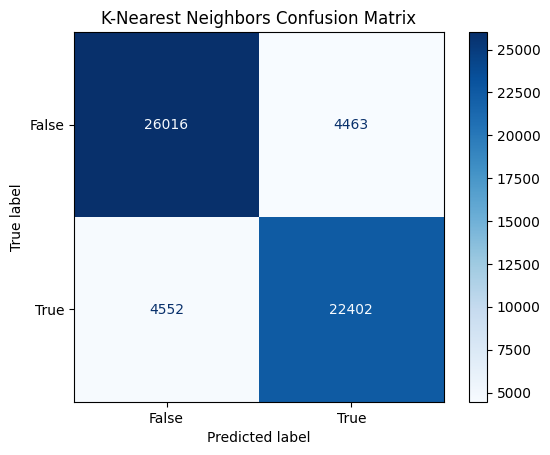

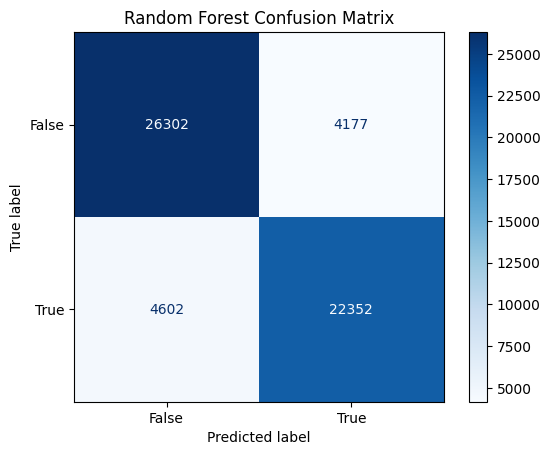

In [ ]:
# Definir os modelos
models = {
    "K-Nearest Neighbors": trained_models["K-Nearest Neighbors"],
    "Random Forest": trained_models["Random Forest"]
}

for name, model in models.items():
    # Fazer previsões
    y_pred = model.predict(X_test)

    # Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Exibir a matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

#### 15. **Selecionar o mais promissor**

O Random Forest é considerado o modelo mais promissor para este projeto devido à sua capacidade de lidar com grandes volumes de dados e variáveis categóricas, características presentes no nosso dataset. Este algoritmo de aprendizado de máquina é um método de ensemble que constrói múltiplas árvores de decisão durante o treinamento e combina suas previsões para melhorar a precisão e evitar overfitting. A robustez do Random Forest em relação a outliers e dados ruidosos, juntamente com sua habilidade de capturar interações complexas entre variáveis, o torna ideal para prever dificuldades de enfrentamento (Coping Struggles) em um contexto de saúde mental. Além disso, a facilidade de interpretação dos resultados, através da importância das features, permite identificar os fatores mais influentes na previsão, auxiliando na tomada de decisões informadas para intervenções preventivas e personalizadas.

#### 16. **Ajuste Fino dos Hiperparâmetros Usando Validação Cruzada**

In [ ]:
# Definir o modelo
rf = RandomForestClassifier(random_state=42)

# Definir a grade de hiperparâmetros para ajuste fino
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar a busca em grade com validação cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar o modelo aos dados de treino
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Validar o modelo com os melhores hiperparâmetros usando validação cruzada
best_rf = grid_search.best_estimator_
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

print(f"Pontuações de validação cruzada: {cv_scores}")
print(f"Média das pontuações de validação cruzada: {cv_scores.mean()}")

# Avaliar o modelo final nos dados de teste
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Melhores hiperparâmetros: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Pontuações de validação cruzada: [0.86673486 0.86690898 0.86991251 0.86547251 0.86568723]
Média das pontuações de validação cruzada: 0.8669432189406466
              precision    recall  f1-score   support

       False       0.86      0.88      0.87     30479
        True       0.86      0.84      0.85     26954

    accuracy                           0.86     57433
   macro avg       0.86      0.86      0.86     57433
weighted avg       0.86      0.86      0.86     57433



#### 17. **Tentar Métodos de Ensemble**

In [ ]:
# Definir outros modelos
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Ajustar os modelos aos dados de treino
gb.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Criar o Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('gb', gb),
    ('lr', lr)
], voting='hard')

# Ajustar o Voting Classifier aos dados de treino
voting_clf.fit(X_train, y_train)

# Avaliar o Voting Classifier nos dados de teste
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.72      0.82      0.76     30479
        True       0.76      0.63      0.69     26954

    accuracy                           0.73     57433
   macro avg       0.74      0.73      0.73     57433
weighted avg       0.74      0.73      0.73     57433



#### 18. **Avaliar o Sistema Final no Conjunto de Testes**

In [ ]:
# Avaliar o desempenho do best_rf no conjunto de testes
best_rf_predictions = best_rf.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)

# Avaliar o desempenho do voting_clf no conjunto de testes
voting_clf_predictions = voting_clf.predict(X_test)
voting_clf_accuracy = accuracy_score(y_test, voting_clf_predictions)

# Escolher o modelo com a melhor acurácia
if best_rf_accuracy > voting_clf_accuracy:
    final_model = best_rf
    print("best_rf foi escolhido como o modelo final com acurácia de:", best_rf_accuracy)
else:
    final_model = voting_clf
    print("voting_clf foi escolhido como o modelo final com acurácia de:", voting_clf_accuracy)

# Testar o modelo final no conjunto de testes
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print("Acurácia do modelo final no conjunto de testes:", final_accuracy)

best_rf foi escolhido como o modelo final com acurácia de: 0.8607420820782477
Acurácia do modelo final no conjunto de testes: 0.8607420820782477


#### 19. **Apresentação do Modelo**

In [ ]:
# Previsões do modelo final
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

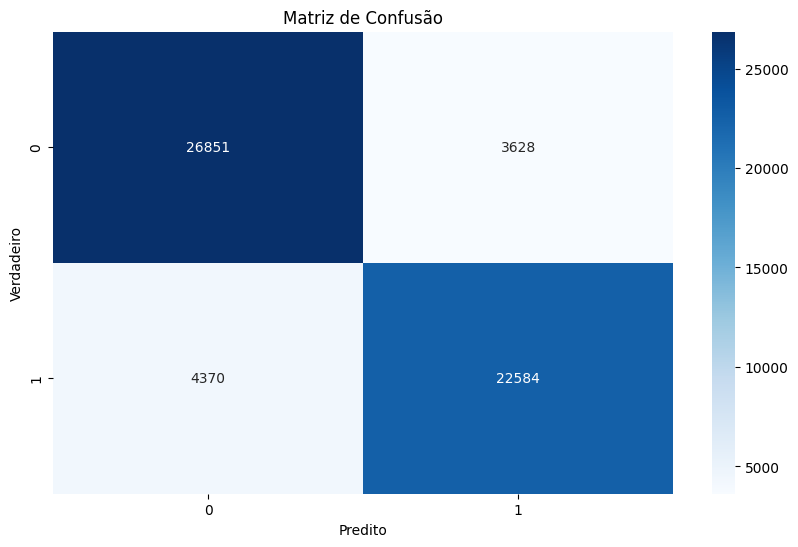

In [ ]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

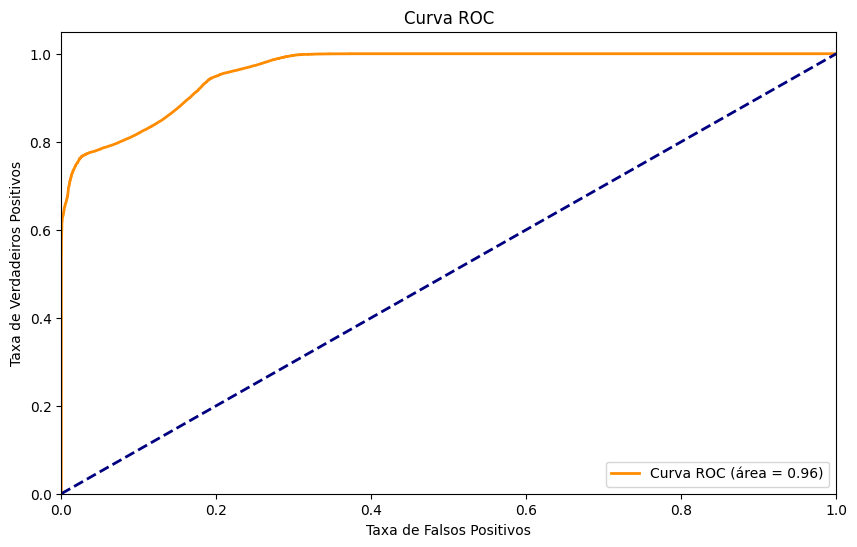

In [ ]:
# Curva ROC e AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

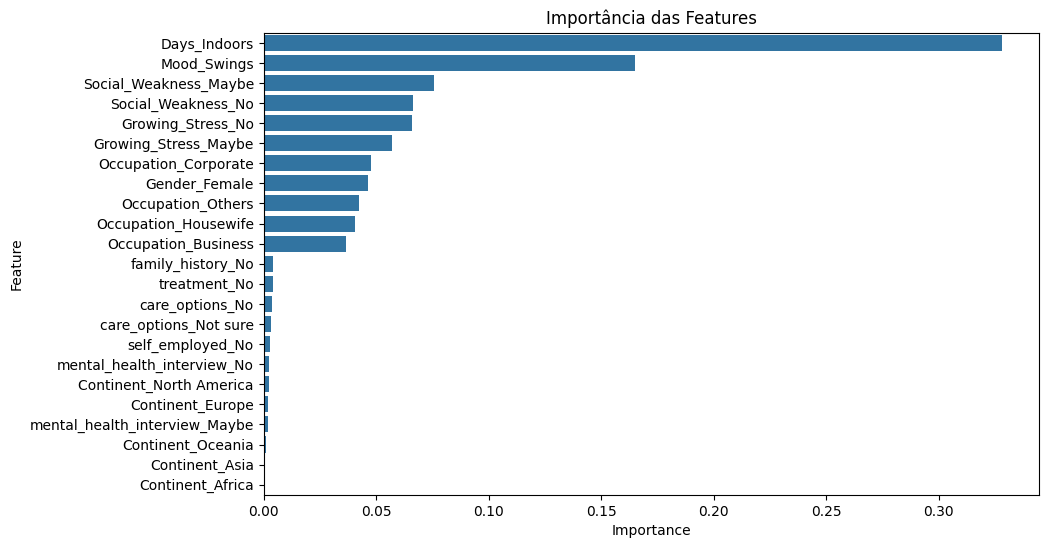

In [ ]:
# Importância das Features (se aplicável)
if hasattr(final_model, 'feature_importances_'):
    feature_importances = final_model.feature_importances_
    features = X.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Importância das Features')
    plt.show()
else:
    print("O modelo final não possui o atributo feature_importances_")

#### 20. **Rodada Rápida de Seleção e Engenharia de Features**

Para melhorar a eficiência e a performance do nosso modelo preditivo, vamos tentar reduzir a dimensionalidade dos dados utilizando a técnica de seleção de features com SelectKBest e a função chi2. A redução da dimensionalidade é uma etapa crucial no pré-processamento de dados, pois ajuda a eliminar atributos irrelevantes ou redundantes, diminuindo a complexidade do modelo e potencialmente melhorando sua precisão. O SelectKBest seleciona as melhores features com base em testes estatísticos, e o chi2 é um teste de independência que avalia a relação entre cada feature e a variável alvo. Ao aplicar essa técnica, esperamos identificar um subconjunto de features que mais contribuem para a previsão das dificuldades de enfrentamento, resultando em um modelo mais enxuto e eficiente.

In [ ]:
# NÃO TESTEI REDUZIR O NÚMERO DE FEATURES AINDA PARA ESSE MODELO

# Seleção de features usando SelectKBest
selector = SelectKBest(chi2, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Verificar as features selecionadas
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]
print("Selected features:", selected_feature_names)

In [ ]:
# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.86      0.88      0.87     30479
        True       0.86      0.84      0.85     26954

    accuracy                           0.86     57433
   macro avg       0.86      0.86      0.86     57433
weighted avg       0.86      0.86      0.86     57433



#### 21. **Lançamento do Modelo**

In [ ]:
# Salvar o modelo final em um arquivo
joblib_file = "final_model.joblib"
joblib.dump(final_model, joblib_file)

print(f"Modelo final salvo em {joblib_file}")

Modelo final salvo em final_model.joblib


# Carregando modelo e testando respostas da turma

In [ ]:
# teste do modelo final

!pip install joblib

In [ ]:
import joblib

## Teste do modelo

In [ ]:
df_test = pd.read_csv('/content/Investigando o potencial do burnout (respostas) - Respostas ao formulário 1.csv')

In [ ]:
df_test.head()

,Carimbo de data/hora,Qual é o seu gênero?,Em qual país você reside atualmente?,Qual sua ocupação?,Você é autônomo?,Você possui histórico familiar de problemas de saúde mental?,Você está em tratamento para questões de saúde mental?,"Quantos dias você fica dentro de casa sem sair, em média, no mês?",Você sente que seu estresse está aumentando?,Você notou alguma mudança significativa em seus hábitos recentemente?,Você possui histórico pessoal de problemas de saúde mental?,Como você descreveria a intensidade das oscilações de humor que enfrentam?,Você encontra dificuldades em lidar com problemas?,Você sente interesse e motivação no seu trabalho atual?,Você percebe alguma dificuldade social ou de interação com outras pessoas?,Você teve uma entrevista de saúde mental no ambiente de trabalho?,Você sente que possui opções adequadas de cuidado e suporte para sua saúde mental?
0,11/11/2024 10:24:21,Female,Brazil,Business,No,No,No,1-14 days,No,No,No,Leve,No,Yes,No,No,Yes
1,11/11/2024 13:25:17,Male,Brazil,Corporativa,No,Yes,No,1-14 days,No,No,No,Leve,No,Yes,No,No,Yes
2,11/11/2024 13:29:27,Male,Brazil,Corporativa,No,Yes,No,1-14 days,Yes,Yes,Yes,Moderado,No,No,No,Yes,No
3,11/11/2024 13:29:35,Male,Brazil,Corporativa,No,Yes,Yes,1-14 days,Yes,No,No,Moderado,No,No,No,No,Yes
4,11/11/2024 13:34:36,Male,Brazil,Corporativa,No,No,No,1-14 days,No,No,Yes,Moderado,No,No,Yes,No,Yes


In [ ]:
rename_dict = {
    "Carimbo de data/hora": "timestamp",
    'Qual é o seu gênero?  ': "Gender",
    "Em qual país você reside atualmente? ": "Country",
    "Qual sua ocupação?": "Occupation",
    "Você é autônomo? ": "self_employed",
    "Você possui histórico familiar de problemas de saúde mental? ": "family_history",
    "Você está em tratamento para questões de saúde mental? ": "treatment",
    "Quantos dias você fica dentro de casa sem sair, em média, no mês? ": "Days_Indoors",
    "Você sente que seu estresse está aumentando?": "Growing_Stress",
    "Você notou alguma mudança significativa em seus hábitos recentemente?  ": "Changes_Habits",
    "Você possui histórico pessoal de problemas de saúde mental?  ": "Mental_Health_History",
    "Como você descreveria a intensidade das oscilações de humor que enfrentam?  ": "Mood_Swings",
    "Você encontra dificuldades em lidar com problemas?  ": "Coping_Struggles",
    "Você sente interesse e motivação no seu trabalho atual?  ": "Work_Interest",
    "Você percebe alguma dificuldade social ou de interação com outras pessoas?  ": "Social_Weakness",
    "Você teve uma entrevista de saúde mental no ambiente de trabalho?  ": "mental_health_interview",
    "Você sente que possui opções adequadas de cuidado e suporte para sua saúde mental?  ": "care_options"
}



#Renomeando as colunas
df_test.rename(columns=rename_dict, inplace=True)

print(df_test.columns)


Index(['timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


In [ ]:
df_test.columns

Index(['timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [ ]:
# Dicionário de tradução
occupation_translation = {
    "Business": "Business",
    "Corporativa": "Corporate",
    "Negócios": "Business",
    "Outros": "Others",
    "Estudante": "Student"
}

# Aplicar a tradução na coluna Occupation
df_test['Occupation'] = df_test['Occupation'].replace(occupation_translation)


In [ ]:
# Dicionário de tradução
Mood_Swings_translation = {
    "Leve": "Low",
    "Moderado": "Medium",
    "Negócios": "Business",
    "Alto": "High",

}

# Aplicar a tradução na coluna Occupation
df_test['Mood_Swings'] = df_test['Mood_Swings'].replace(Mood_Swings_translation)


In [ ]:
# Dicionário de tradução
Days_Indoors_translation = {
    "1-14 days": "1-14 days",
    "15-28 days": "15-30 days",
    "29-31 days": "31-60 days",


}

# Aplicar a tradução na coluna Occupation
df_test['Days_Indoors'] = df_test['Days_Indoors'].replace(Days_Indoors_translation)


In [ ]:
# Dicionário de tradução
care_options_translation = {

    "Eu não sei": "Not sure",


}

# Aplicar a tradução na coluna Occupation
df_test['care_options'] = df_test['care_options'].replace(care_options_translation)


In [ ]:
df_test.drop(columns=['timestamp','Country'], inplace=True)


for col in df_test.columns:
    print(f"Valores únicos em {col}:")
    print(df_test[col].unique())
    print(df[col].unique())
    print("\n")



Valores únicos em Gender:
['Female' 'Male' 'Other']
['Female' 'Male']


Valores únicos em Occupation:
['Business' 'Corporate' 'Others' 'Student']
['Corporate' 'Student' 'Business' 'Housewife' 'Others']


Valores únicos em self_employed:
['No' 'Yes']
[nan 'No' 'Yes']


Valores únicos em family_history:
['No' 'Yes']
['No' 'Yes']


Valores únicos em treatment:
['No' 'Yes']
['Yes' 'No']


Valores únicos em Days_Indoors:
['1-14 days' '15-30 days']
['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']


Valores únicos em Growing_Stress:
['No' 'Yes']
['Yes' 'No' 'Maybe']


Valores únicos em Changes_Habits:
['No' 'Yes']
['No' 'Yes' 'Maybe']


Valores únicos em Mental_Health_History:
['No' 'Yes']
['Yes' 'No' 'Maybe']


Valores únicos em Mood_Swings:
['Low' 'Medium']
['Medium' 'Low' 'High']


Valores únicos em Coping_Struggles:
['No' 'Yes']
['No' 'Yes']


Valores únicos em Work_Interest:
['Yes' 'No']
['No' 'Maybe' 'Yes']


Valores únicos em Social_Weakness:
['No' 'Yes'

In [ ]:
# Adicionar a coluna 'Continent' com valor 'South America' em todas as linhas
df_test['Continent'] = 'South America'

In [ ]:
columns_to_encode = [
    'Gender', 'Occupation', 'self_employed', 'family_history', 'treatment',
    'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles',
    'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options', 'Continent'
]
df_test_encoded = pd.get_dummies(df_test, columns=columns_to_encode)

In [ ]:
features = [
    'Gender_Female',
    'Continent_Africa', 'Continent_Asia', 'Continent_Europe',
    'Continent_North America','Continent_South America', 'Continent_Oceania',
    'Occupation_Business', 'Occupation_Corporate', 'Occupation_Housewife',
    'Occupation_Others',
    'self_employed_No',
    'family_history_No',
    'treatment_No',
    'Days_Indoors',
    'Social_Weakness_Maybe', 'Social_Weakness_No',
    'mental_health_interview_Maybe', 'mental_health_interview_No',
    'care_options_No', 'care_options_Not sure',
    'Mood_Swings',  # Mantém como label encoded
    'Growing_Stress_Maybe', 'Growing_Stress_No'  # Exclui 'Growing_Stress_Yes'
]

df_test_encoded = df_test_encoded[features]

KeyError: "['Continent_Africa', 'Continent_Asia', 'Continent_Europe', 'Continent_North America', 'Continent_Oceania', 'Occupation_Housewife', 'Social_Weakness_Maybe', 'mental_health_interview_Maybe', 'Growing_Stress_Maybe'] not in index"

In [ ]:
pipeline_loaded = joblib.load('/content/final_model.joblib')


predictions = pipeline_loaded.predict(df_test_encoded)
print(predictions)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Changes_Habits_No
- Changes_Habits_Yes
- Continent_South America
- Coping_Struggles_No
- Coping_Struggles_Yes
- ...
Feature names seen at fit time, yet now missing:
- Continent_Africa
- Continent_Asia
- Continent_Europe
- Continent_North America
- Continent_Oceania
- ...


---

ESCREVER SOBRE A PRETENSAO DE IMPLEMENTACAO DO MODELO E OS BENEFICIOS QUE ELE TRARA PARA A SEGURADORA DE SAUDE

---

In [ ]:
Sicikit-Learn, Keras & Tensor Florw. Alta Books, 2ª edição. 20121 Rio de Janeiro.

Achados em artigos científicos sobre o tema:

"Os prontuários eletrônicos de saúde (EHRs) contêm informações valiosas sobre o histórico médico de um paciente e podem ser usados ​​para treinar, testar e manter modelos preditivos para dar suporte e melhorar o atendimento ao paciente." (Msosa et al., 2023).

"Este estudo examina as condições de trabalho para o bem-estar físico e emocional dos funcionários, com o objetivo de aumentar a conscientização geral sobre questões do local de trabalho relacionadas à saúde mental." (Lohia et al., 2023).

“Estudantes universitários estão cada vez mais vulneráveis ​​a transtornos psicológicos devido a pressões externas, tornando a análise da saúde mental essencial para uma intervenção oportuna.” (Min et al., 2024).

"O aumento do tempo gasto nas mídias sociais se correlaciona positivamente com maiores problemas de saúde mental, especialmente entre grupos demográficos mais jovens." (Purohit et al., 2024).

“Modelos de aprendizado de máquina, como Regressão Logística e Floresta Aleatória, oferecem potencial significativo para analisar a saúde mental dos alunos.” (Pritam et al., 2024).

“A previsão proativa de doenças psicológicas tem o potencial de mitigar a gravidade e as consequências de longo prazo dessas condições.” (Jayakumar & Reshma, 2024).

"Árvores de decisão alcançaram a maior precisão de 83,05% na previsão de condições de saúde mental, destacando a importância da engenharia de recursos." (Kaushik et al., 2024).

"A regressão logística e o KNN foram aplicados para prever a adesão ao tratamento de saúde mental, demonstrando a utilidade do aprendizado de máquina na área da saúde." (Shah et al., 2023).

"A mineração de regras de associação combinada com o algoritmo Apriori fornece um modelo mais preciso e confiável para a previsão de risco à saúde mental dos alunos." (Chen, 2024).

Referências
Géron, Aurélien. Mãos à Obra: Aprendizado de Máquina com Scikrn
Msosa, YJ, Grauslys, A., Zhou, Y., Wang, T., Buchan, I., Langan, P., ... & Kehoe, D. (2023). Dados confiáveis ​​e ambientes de IA para predição clínica: aplicação ao risco de crise em pessoas com depressão. IEEE Journal of Biomedical and Health Informatics, 27 (11).
Lohia, A., Ranjith, A., Sachdeva, A., & Bhat, A. (2023). Uma técnica de conjunto para analisar a saúde mental da força de trabalho no setor corporativo. 7ª Conferência Internacional sobre Computação Inteligente e Sistemas de Controle (ICICCS) .
Min, Q., & Jain, A. (2024). Análise da saúde mental de estudantes universitários com base no algoritmo de aprendizado de máquina. Conferência Internacional sobre Circuitos Integrados e Sistemas de Comunicação (ICICACS) .
Purohit, S., Mudgal, R., Vats, S., Rana, P., & Verma, A. (2024). Analisando o impacto do uso de mídias sociais na saúde mental: uma abordagem de aprendizado de máquina. 15ª Conferência Internacional sobre Tecnologias de Comunicação e Redes de Computação (ICCCNT) .
Pritam, N., Gill, KS, Kumar, M., Rawat, R., & Banerjee, D. (2024). Classificação da Análise de Saúde Mental de Estudantes usando Regressão Logística e outras técnicas de classificação por meio de Métodos de Aprendizado de Máquina. 3ª Conferência Internacional para Inovação em Tecnologia (INOCON) .
Jayakumar, N., & Reshma, N. (2024). Modelagem de saúde mental: avanços na ciência preditiva em direção a cuidados de saúde proativos. Conferência Internacional IEEE para Mulheres em Inovação, Tecnologia e Empreendedorismo (ICWITE) .
Kaushik, P., Jain, E., Gill, KS, Upadhyay, D., & Devliyal, S. (2024). Otimizando a predição de saúde mental por meio do ajuste fino dos parâmetros do classificador de decisão para maior precisão. 2ª Conferência Internacional sobre Computação Sustentável e Sistemas Inteligentes (ICSCSS) .
Shah, OA, & Ahmad, M. (2023). Predição de adesão ao tratamento de saúde mental usando algoritmos de aprendizado de máquina. Conferência Internacional sobre Inteligência Computacional, Tecnologia de Comunicação e Redes (CICTN) .
Chen, J. (2024). Predição de risco de saúde mental de estudantes com base no algoritmo a priori no contexto de Big Data. Conferência Internacional sobre Acionamentos Elétricos, Eletrônica de Potência e Engenharia (EDPEE) .